In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar los datos (reemplaza 'path_to_file' con la ruta real)
movies = pd.read_csv('./data/train_data/Movies.csv')
film_details = pd.read_csv('./data/train_data/FilmDetails.csv')


In [2]:
movies

,id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
0,1,The Shawshank Redemption,"Drama, Crime",en,8.7,2,22,1994-09-23,27070
1,2,The Godfather,"Drama, Crime",en,8.7,2,55,1972-03-14,20563
2,3,The Godfather Part II,"Drama, Crime",en,8.6,3,22,1974-12-20,12403
3,4,Schindler's List,"Drama, History, War",en,8.6,3,15,1993-12-15,15810
4,5,12 Angry Men,Drama,en,8.5,1,37,1957-04-10,8611
...,...,...,...,...,...,...,...,...,...
9713,9714,Alone in the Dark,"Action, Fantasy, Horror",en,3.3,1,38,2005-01-28,602
9714,9715,Disaster Movie,Comedy,en,3.2,1,27,2008-08-29,1021
9715,9716,House of the Dead,"Horror, Action, Thriller",en,3.1,1,30,2003-04-11,384
9716,9717,Dragonball Evolution,"Action, Adventure, Fantasy, Science Fiction, T...",en,2.9,1,25,2009-03-12,2028


In [3]:
film_details

,id,director,top_billed,budget_usd,revenue_usd
0,1,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",25000000.0,28341469.0
1,2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",6000000.0,245066411.0
2,3,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",13000000.0,102600000.0
3,4,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",22000000.0,321365567.0
4,5,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",397751.0,4360000.0
...,...,...,...,...,...
9713,9714,Uwe Boll,"Christian Slater, Tara Reid, Stephen Dorff, Wi...",20000000.0,12693645.0
9714,9715,Aaron Seltzer,"Matt Lanter, Vanessa Lachey, Gary 'G. Thang' J...",25000000.0,34816824.0
9715,9716,Uwe Boll,"Jonathan Cherry, Tyron Leitso, Clint Howard, O...",12000000.0,13818181.0
9716,9717,James Wong,"Justin Chatwin, Chow Yun-fat, Joon Park, Jamie...",30000000.0,58228460.0


In [11]:
# === 2. Limpieza y preparación ===
# Combinar tablas por 'id'
data = pd.merge(movies, film_details, on='id')

# Seleccionar columnas relevantes
columns = [
    'genres', 'language', 'budget_usd', 'revenue_usd',
    'vote_count', 'runtime_hour', 'runtime_min', 'director', 'user_score'
]

# Transformar columnas 'budget_usd', 'revenue_usd' en numericas
data['budget_usd'] = pd.to_numeric(data['budget_usd'], errors='coerce')
data['revenue_usd'] = pd.to_numeric(data['revenue_usd'], errors='coerce')

data = data[columns]

# Eliminar filas con valores nulos
data = data.dropna()

# Codificar variables categóricas (Label Encoding para este ejemplo)
le_language = LabelEncoder()
data['language_encoded'] = le_language.fit_transform(data['language'])

le_director = LabelEncoder()
data['director_encoded'] = le_director.fit_transform(data['director'])
data

# Convertir géneros en columnas booleanas
available_genders = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'Short']
genres_dummies = data['genres'].str.get_dummies(sep=',')
# Fusionar columnas duplicadas de generos
# (Porque se crean columnas con espacio al principio ejemplo 'Action' y ' Action')
genres_dummies.columns = genres_dummies.columns.str.strip() #Eliminar espacios
genres_dummies = genres_dummies.groupby(genres_dummies.columns, axis=1).any()

#add missing gender columns
missing_columns = set(available_genders) - set(genres_dummies.columns)
if missing_columns:
        genres_dummies = genres_dummies.assign(**{col: False for col in missing_columns})

data = pd.concat([data, genres_dummies], axis=1)
data = data.drop(columns=['genres'])

# Escalar variables numéricas
#scaler = StandardScaler()
#data[['budget_usd', 'revenue_usd', 'vote_count', 'runtime_hour', 'runtime_min']] = scaler.fit_transform(
#  data[['budget_usd', 'revenue_usd', 'vote_count', 'runtime_hour', 'runtime_min']]
#)
data

/tmp/ipykernel_142/1584938002.py:34: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  genres_dummies = genres_dummies.groupby(genres_dummies.columns, axis=1).any()


,language,budget_usd,revenue_usd,vote_count,runtime_hour,runtime_min,director,user_score,language_encoded,director_encoded,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Short
0,en,25000000.0,28341469.0,27070,2,22,Frank Darabont,8.7,6,699,...,False,False,False,False,False,False,False,False,False,False
1,en,6000000.0,245066411.0,20563,2,55,Francis Ford Coppola,8.7,6,690,...,False,False,False,False,False,False,False,False,False,False
2,en,13000000.0,102600000.0,12403,3,22,Francis Ford Coppola,8.6,6,690,...,False,False,False,False,False,False,False,False,False,False
3,en,22000000.0,321365567.0,15810,3,15,Steven Spielberg,8.6,6,2157,...,False,False,False,False,False,False,False,True,False,False
4,en,397751.0,4360000.0,8611,1,37,Sidney Lumet,8.5,6,2074,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712,en,44000000.0,29725663.0,839,1,57,Roger Christian,3.3,6,1953,...,False,False,False,False,True,False,False,False,False,False
9713,en,20000000.0,12693645.0,602,1,38,Uwe Boll,3.3,6,2312,...,True,False,False,False,False,False,False,False,False,False
9714,en,25000000.0,34816824.0,1021,1,27,Aaron Seltzer,3.2,6,6,...,False,False,False,False,False,False,False,False,False,False
9715,en,12000000.0,13818181.0,384,1,30,Uwe Boll,3.1,6,2312,...,True,False,False,False,False,False,True,False,False,False


In [7]:
all_genres = ', '.join(genres_dummies.columns)
all_genres

'Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, History, Horror, Music, Mystery, Romance, Science Fiction, TV Movie, Thriller, War, Western, Short'

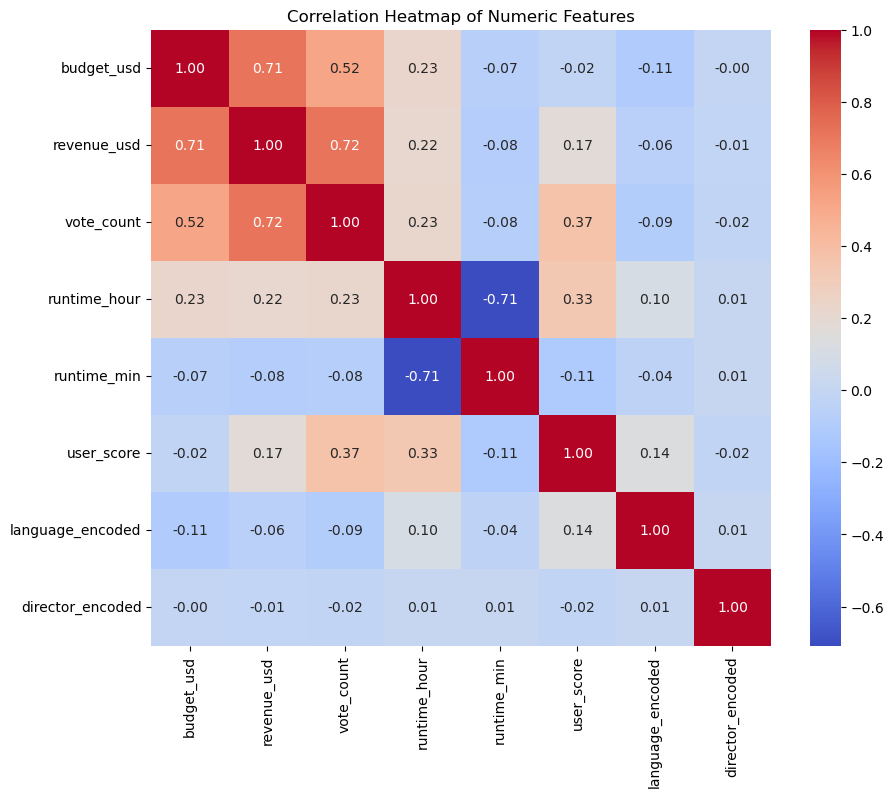

In [8]:
# Correlation heatmap for numeric features
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

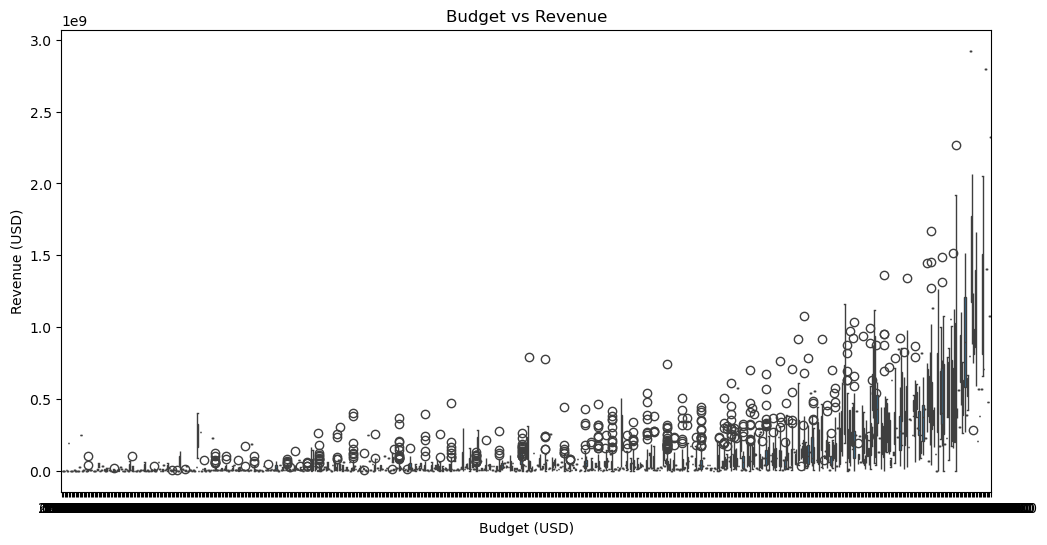

In [12]:
# Box plot of budget vs revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='budget_usd', y='revenue_usd', data=data)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.show()

In [13]:
maxRev = data.loc[data['revenue_usd'] == data['revenue_usd'].max(), ['director', 'revenue_usd','director_encoded']]
minRev = data.loc[data['revenue_usd'] == data['revenue_usd'].min(), ['director', 'revenue_usd','director_encoded']]
print(maxRev)
print(minRev)

           director   revenue_usd  director_encoded
1051  James Cameron  2.923706e+09               928
         director  revenue_usd  director_encoded
7019  John Waters       3491.0              1149


In [14]:
find = data.loc[data['director_encoded'] == 928, ['director', 'revenue_usd']]
find

,director,revenue_usd
179,James Cameron,5.200000e+08
358,James Cameron,1.833165e+08
420,James Cameron,2.264162e+09
865,James Cameron,7.837120e+07
957,James Cameron,2.320250e+09
1051,James Cameron,2.923706e+09
1842,James Cameron,9.000010e+07
2956,James Cameron,3.789000e+08


In [15]:
# === 3. División de datos en entrenamiento y prueba ===
# Variables predictoras y objetivo
X = data.drop(columns=['revenue_usd', 'language', 'director'])
y = data['revenue_usd']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (4902, 26)
Tamaño del conjunto de prueba: (1226, 26)


In [16]:
from sklearn.ensemble import RandomForestRegressor
# === 4. Entrenamiento del modelo ===
# Entrenar Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"MAE: {mae}") #Un MAE(Mean Absolute Error) De 0 a ∞ más bajo significa que el modelo está haciendo predicciones más precisas.
print(f"R²: {r2}")#Coeficiente de Determinación % de la variabilidad en los datos reales es explicada por el modelo.
print("RMSE", rmse)#Indica el error promedio cuadrático. Es útil porque penaliza errores grandes más que el MAE.
print("Mediana_EA", medae) #Ayuda a reducir el impacto de valores atípicos (outliers).
print("Explained_Variance", explained_var) #Mide qué tan bien el modelo explica la variabilidad de los datos.

MAE: 47047815.43399674
R²: 0.7906377062495678
RMSE 8591629407182444.0
Mediana_EA 25033729.560000002
Explained_Variance 0.7907724671175405


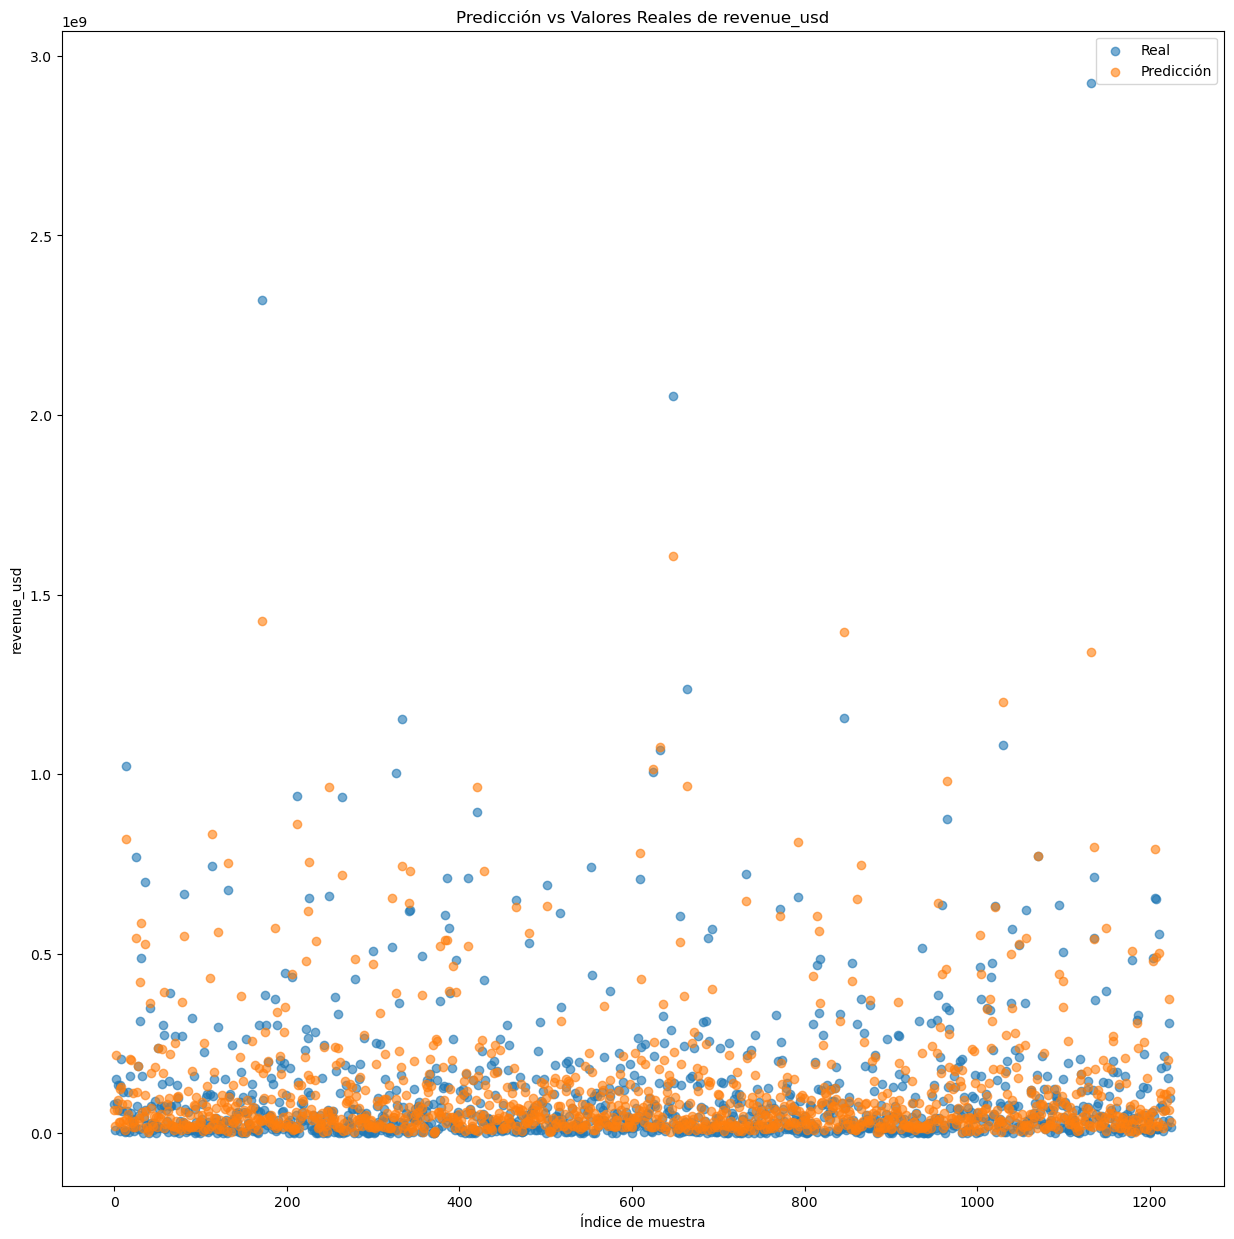

In [14]:
# === 6. Visualización de resultados ===
plt.figure(figsize=(15, 15))
plt.scatter(range(len(y_test)), y_test, label="Real", alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, label="Predicción", alpha=0.6)
plt.legend()
plt.title("Predicción vs Valores Reales de revenue_usd")
plt.xlabel("Índice de muestra")
plt.ylabel("revenue_usd")
plt.show()

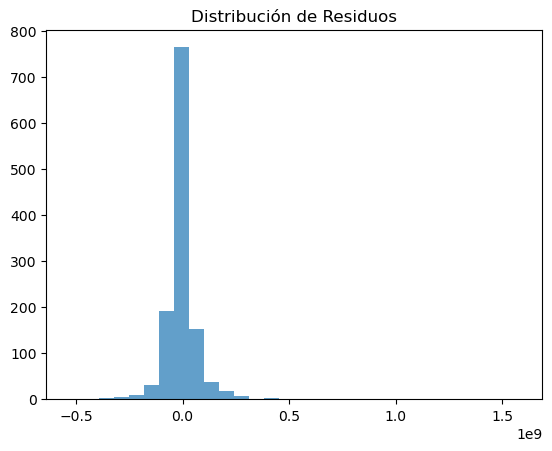

In [17]:
residuos = y_test - y_pred
plt.hist(residuos, bins=30, alpha=0.7)
plt.title("Distribución de Residuos")
plt.show()

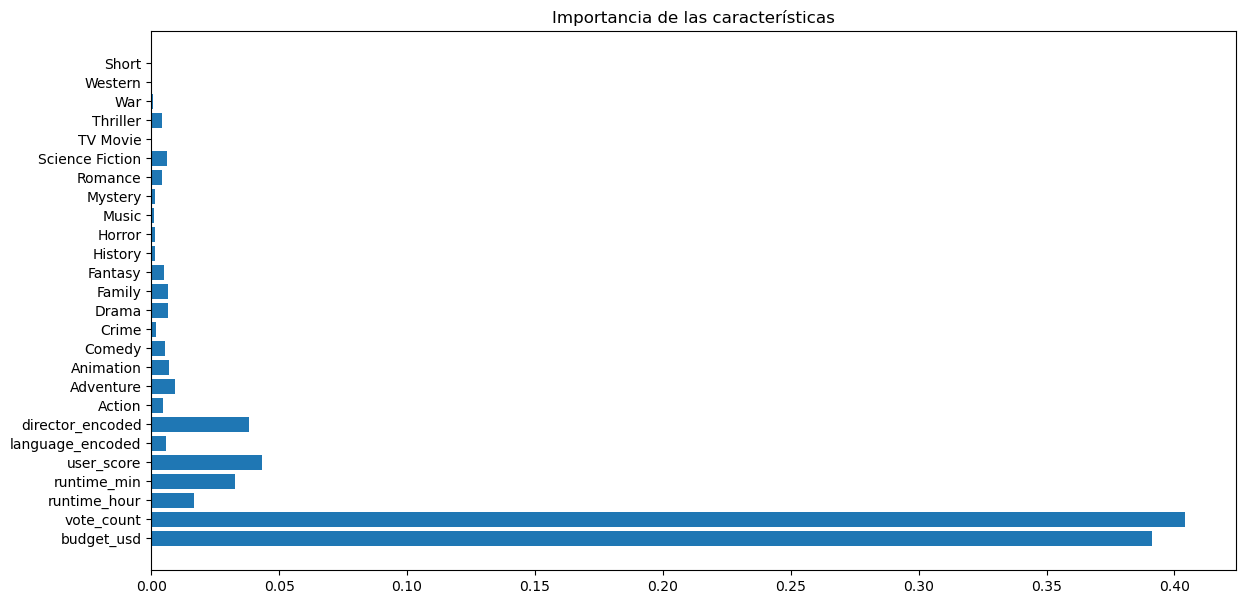

In [18]:
# Importancia de las características
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(14, 7))
plt.barh(features, importances)
plt.title("Importancia de las características")
plt.show()

In [4]:
pre_data =  pd.merge(movies, film_details, on='id')
#Datos que tengan alguna de las columnas especificadas en nulo
null_values_mask = pre_data[['genres', 'language', 'budget_usd', 'revenue_usd', 'vote_count', 'runtime_hour', 'runtime_min', 'director', 'user_score']].isnull().any(axis=1)
#Datos que tengan el budget pero no el revenue_usd en nulo (para pruebas)
test_values_mask = pre_data['revenue_usd'].isnull() & ~pre_data['budget_usd'].isnull()
#Datos que tengan el revenue_usd pero no el budget en nulo (para entrenar, pero hay que completar la columna budget)
test_values_mask2 = ~pre_data['revenue_usd'].isnull() & pre_data['budget_usd'].isnull()
#Datos que tengan el revenue_usd pero no el budget en nulo (para entrenar o para pruebas pero hay que completar ambas columnas)
test_values_mask3 = pre_data['revenue_usd'].isnull() & pre_data['budget_usd'].isnull()

null_values = pre_data[null_values_mask]
test_values = pre_data[test_values_mask]
test_values2 = pre_data[test_values_mask2]
test_values3 =  pre_data[test_values_mask3]

null_values.to_csv("null_values.csv", index=False)
test_values.to_csv("test_values.csv", index=False)
test_values2.to_csv("test_values2.csv", index=False)
test_values3.to_csv("test_values3.csv", index=False)

print("Número de filas con al menos un valor nulo: ", null_values.shape)
print("Número de filas con revenue_usd nulo: ", test_values.shape)
print("Número de filas con budget_usd nulo: ", test_values2.shape)
print("Número de filas con revenue_usd y budget_usd nulo: ", test_values3.shape)

Número de filas con al menos un valor nulo:  (3590, 13)
Número de filas con revenue_usd nulo:  (609, 13)
Número de filas con budget_usd nulo:  (1049, 13)
Número de filas con revenue_usd y budget_usd nulo:  (1932, 13)


In [20]:
# === 7. Probar modelo ===
raw_data = pd.read_csv('./data/test_data/no_revenue.csv')
print('Raw data shape', raw_data.shape)

#Validate columns
necesary_columns = ['genres', 'language', 'budget_usd', 'vote_count', 'runtime_hour', 'runtime_min', 'director', 'user_score']

is_valid_columns = all(col in rawData.columns for col in columns)
if(not is_valid_columns):
    print("Invalid format")

pp_data = rawData
#clean values
pp_data = pp_data[columns].dropna()

# Parse into numeric columnns
pp_data['budget_usd'] = pd.to_numeric(pp_data['budget_usd'], errors='coerce')

#Codify columns
le_language = LabelEncoder()
pp_data['language_encoded'] = le_language.fit_transform(pp_data['language'])
le_director = LabelEncoder()
pp_data['director_encoded'] = le_director.fit_transform(pp_data['director'])

available_genders = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'Short']

data_genders = pp_data['genres'].str.get_dummies(sep=',')
data_genders.columns = data_genders.columns.str.strip()
data_genders = data_genders.groupby(data_genders.columns, axis=1).any()

#add missing gender columns
missing_columns = set(available_genders) - set(data_genders.columns)
if missing_columns:
        data_genders = data_genders.assign(**{col: False for col in missing_columns})

pp_data = pd.concat([pp_data, data_genders], axis=1).drop(columns=['genres'])

pp_data = pp_data.drop(columns=['language', 'director', 'Short'])

predictions = model.predict(preData)

result = rawData
result['revenue_usd'] = predictions
result['revenue_usd'] = pd.to_numeric(result['revenue_usd'], errors='coerce')

result.head()

Raw data shape (609, 13)


/tmp/ipykernel_142/156515847.py:29: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_genders = data_genders.groupby(data_genders.columns, axis=1).any()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Short
